## M5 - W1 Assignment: Visualising the Right Way!

We take data visualisation seriously.  With every single one, we as data scientists, try our best to visualise the numbers accurately and in a way that best supports our goals. But sometimes we get it wrong. We can do better in future if we learn from our mistakes . Now, take a look at the two visualisations below about public opinion on Britain's decision to leave the EU. The one on the left represents a not-so-good visualisation while the right one does a better job.

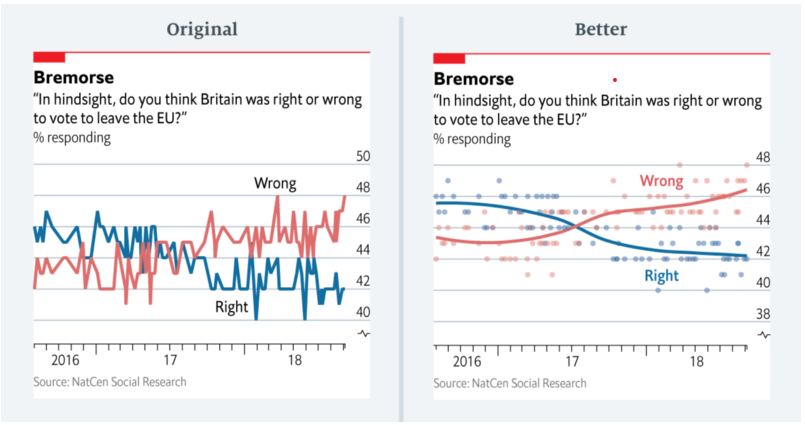

Now your task is the following: 

1- First, explain thoroughly why you think the right one is better than the left one.  

2- Reproduce both of them using Matplotlib. Do your best making them the exact copies.  

As you can see from the two figures above, I totally agree that the right visualization communicates the information much better than the original ones for two following reasons:

1) The original graph is a line plot of two time-series data of the % respondants think that Britian was Right or Wrong to vote to leave the EU over multiple observations; and the numbers fluctuate heavily along the time. This creates abundant of noise in the plot without conveying useful information to the reader, and even hindering the reader the ability to spot the trend over time. As this is public opinion, the fluctuation is unavoidable and is not as important as showing the overal trend in the majority shifting of one opinion over the other. On the other hand, the better version employs the scatterplot technique, which shows the reader a much better overview of the opinion movement with less noise as each data point is represented as a dot, so the reader will not focus on the dots but more about where the dots lie in the graph. The distribution of the dots will conveys the useful informations from the observation.

2) The better version also shows the curved trend lines that is the best fitted function for the distribution of data points for each of the opinion's category. By these trend lines, the reader can visually see the trend over time of each group, where the movement dips and raises, or following the flat lines. with these trend lines, we can conclude that over time, respondants' opinions on this topic matter shift from supporting the Brexit votes to going agaisnt the votes. This is an critical conclusion to take from the data.

I will reproduce both of these graphs below.

In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
from scipy.optimize import curve_fit
import seaborn as sns
import pandas as pd

In [2]:
df_brexit = pd.read_csv("C:/Users/ams-duongn.EXPEDITORS/Desktop/learn/Data Science Master/M5W1/brexit.csv",skiprows=3)
print("brexit : " + str(df_brexit.shape))

brexit : (85, 3)


In [3]:
df_brexit.head()

,Date,% responding right,% responding wrong
0,02/08/16,46,42
1,09/08/16,45,44
2,17/08/16,46,43
3,23/08/16,45,43
4,31/08/16,47,44


In [4]:
new_cols = [col.lower().replace(' ', '_') for col in df_brexit.columns]
df_brexit.columns = new_cols
df_brexit.rename(columns={"%_responding_right": "perc_right", "%_responding_wrong": "perc_wrong"}, inplace=True)
df_brexit.head()

,date,perc_right,perc_wrong
0,02/08/16,46,42
1,09/08/16,45,44
2,17/08/16,46,43
3,23/08/16,45,43
4,31/08/16,47,44


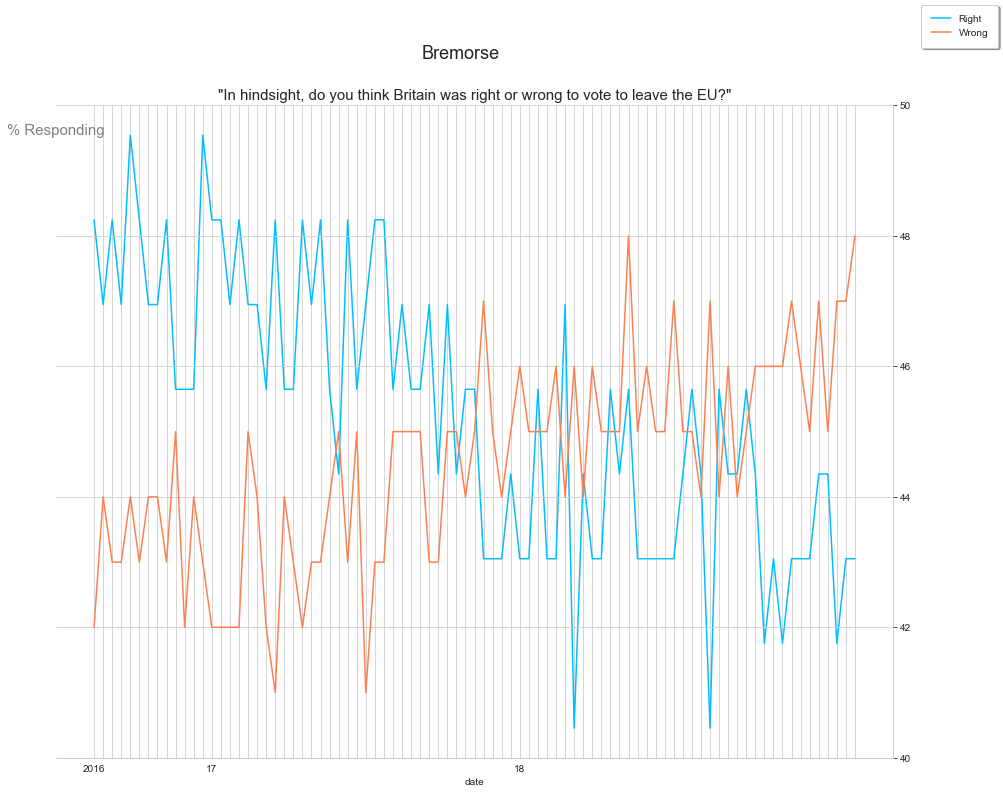

In [5]:
fig = plt.figure(figsize=(15, 12))

sns.set_style("whitegrid")

#plot the data
ax = sns.lineplot(x="date", y="perc_right", data=df_brexit, label="Right", legend=False, color="deepskyblue")
ax2 = ax.twinx()
g = sns.lineplot(x="date", y="perc_wrong", data=df_brexit, label="Wrong", ax=ax2, legend=False, color="coral")

# Hide the left and top spines
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.yaxis.set_major_locator(ticker.NullLocator())
ax.yaxis.set_minor_locator(ticker.NullLocator())

# Only show ticks on the right and bottom spines
ax2.yaxis.set_ticks_position('right')
ax2.xaxis.set_ticks_position('bottom')

#setting plot parameters
ax2.figure.legend(fancybox=True, loc='upper right', framealpha=1, shadow=True, borderpad=1)
ax.set_ylabel('% Responding', color='gray', rotation='horizontal', fontsize=15)
ax.yaxis.set_label_coords(0,0.95)
ax2.yaxis.get_label().set_visible(False)
title_string = "Bremorse"
subtitle_string = '"In hindsight, do you think Britain was right or wrong to vote to leave the EU?"'
plt.suptitle(title_string, y=.95, fontsize=18)
plt.title(subtitle_string, fontsize=15)
plt.ylim(40,50)
g.set_xticklabels(['2016','','','','','','','','','','','','','17','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','18'])

# Tweak spacing between subplots to prevent labels from overlapping
plt.subplots_adjust(hspace=0.2)

plt.show()

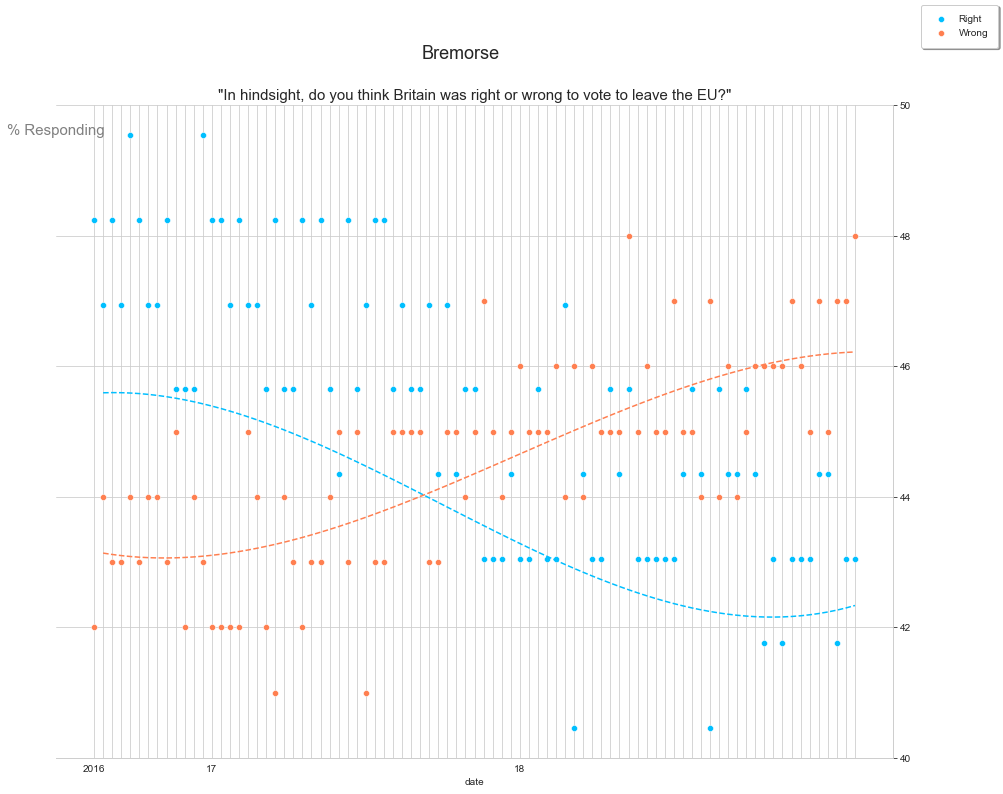

In [6]:
fig = plt.figure(figsize=(15, 12))

sns.set_style("whitegrid")

# define the true objective function for polynomial trendline
def objective(x, a, b, c, d):
	return a * x + b * x**2 + c * x**3 + d

df_brexit.insert(0, 'Observation', range(1, 1 + len(df_brexit)))

data = df_brexit.values

# choose the input and output variables for perc_right
x1, y1 = data[:, 0], data[:, 2]
# curve fit
popt1, _ = curve_fit(objective, x1, y1)
# summarize the parameter values for perc_right
a1, b1, c1, d1 = popt1

# choose the input and output variables for perc_wrong
x2, y2 = data[:, 0], data[:, 3]
# curve fit
popt2, _ = curve_fit(objective, x2, y2)
# summarize the parameter values for perc_right
a2, b2, c2, d2 = popt2

#scatter plot the data
ax = sns.scatterplot(x="date", y="perc_right", data=df_brexit, label="Right", legend=False, color="deepskyblue")
ax2 = ax.twinx()
g = sns.scatterplot(x="date", y="perc_wrong", data=df_brexit, label="Wrong", ax=ax2, legend=False, color="coral")

# Hide the left and top spines
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.yaxis.set_major_locator(ticker.NullLocator())
ax.yaxis.set_minor_locator(ticker.NullLocator())

# Only show ticks on the right and bottom spines
ax2.yaxis.set_ticks_position('right')
ax2.xaxis.set_ticks_position('bottom')

#setting plot parameters
ax2.figure.legend(fancybox=True, loc='upper right', framealpha=1, shadow=True, borderpad=1)
ax.set_ylabel('% Responding', color='gray', rotation='horizontal', fontsize=15)
ax.yaxis.set_label_coords(0,0.95)
ax2.yaxis.get_label().set_visible(False)
title_string = "Bremorse"
subtitle_string = '"In hindsight, do you think Britain was right or wrong to vote to leave the EU?"'
plt.suptitle(title_string, y=.95, fontsize=18)
plt.title(subtitle_string, fontsize=15)
plt.ylim(40,50)
g.set_xticklabels(['2016','','','','','','','','','','','','','17','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','18'])

# define a sequence of inputs between the smallest and largest known inputs
x1_line = np.arange(min(x1), max(x1), 1)
# calculate the output for the range
y1_line = objective(x1_line, a1, b1, c1, d1)
# create a line plot for the mapping function
plt.plot(x1_line, y1_line, '--', color="deepskyblue")

# define a sequence of inputs between the smallest and largest known inputs
x2_line = np.arange(min(x2), max(x2), 1)
# calculate the output for the range
y2_line = objective(x2_line, a2, b2, c2, d2)
# create a line plot for the mapping function
plt.plot(x2_line, y2_line, '--', color="coral")



# Tweak spacing between subplots to prevent labels from overlapping
plt.subplots_adjust(hspace=0.2)

plt.show()